<a href="https://colab.research.google.com/github/Matceo/SyS./blob/main/Serie%26TransformadaDeFourier./S%26S%3AExponencialTrigonom%C3%A9trica%26Compacta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese la componente x de a: 2
Ingrese la componente y de a: 4
Ingrese la componente x de b: 1
Ingrese la componente y de b: 3


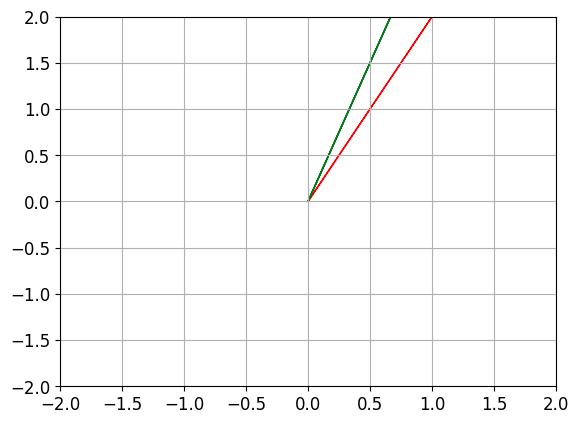

El vector proyectado es:  [1.4 4.2]


In [ ]:
#Ejercicio1

import numpy as np
import matplotlib.pyplot as plt

def proyeccion_lineal(a, b):

    #Calculamos el factor de escala de la proyección:

    escala=np.dot(a, b)/np.dot(b, b)

    #Calculamos el vector proyectado:

    proyectado=escala*b

    #Graficamos los vectores:

    fig, ax=plt.subplots()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.grid(True)
    ax.arrow(0, 0, a[0], a[1], head_width=0.05, head_length=0.1, color='r')
    ax.arrow(0, 0, b[0], b[1], head_width=0.05, head_length=0.1, color='b')
    ax.arrow(0, 0, proyectado[0], proyectado[1], head_width=0.05, head_length=0.1, color='g')
    plt.show()

    #Devolvemos el vector proyectado:

    return proyectado
a=np.array([float(input("Ingrese la componente x de a: ")),  float(input("Ingrese la componente y de a: "))])
b=np.array([float(input("Ingrese la componente x de b: ")),  float(input("Ingrese la componente y de b: "))])
proyectado=proyeccion_lineal(a, b)
print("El vector proyectado es: ", proyectado)

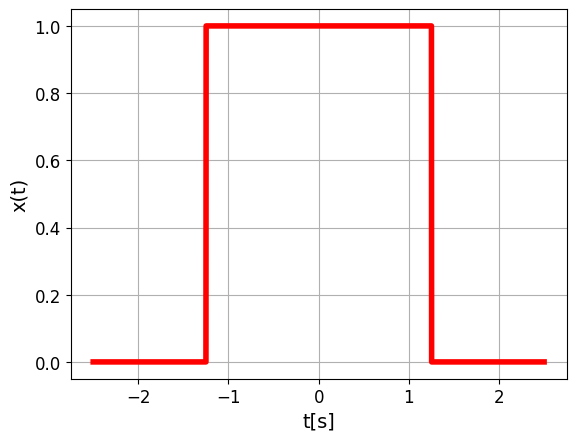

In [ ]:
#Ejercicio2

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
import sympy as sym

warnings.filterwarnings("ignore")
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
A=1 #Amplitud de la señal
T=5 #Segundos de gráfica
Fs=1000 #Frecuencia de muestreo definida
tv=np.arange(-T/2, T/2, 1/Fs) #Vector de tiempo generado
Nm=len(tv) #Número de muestras requeridas
xo=np.zeros(len(tv))
xo[(tv>=-T/4)&(tv<=T/4)]=A

#Se crea la señal A y -A concatenando, para graficar la señal original:

plt.plot(tv, xo, 'r', linewidth=4)
plt.grid()
plt.xlabel("t[s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.show()

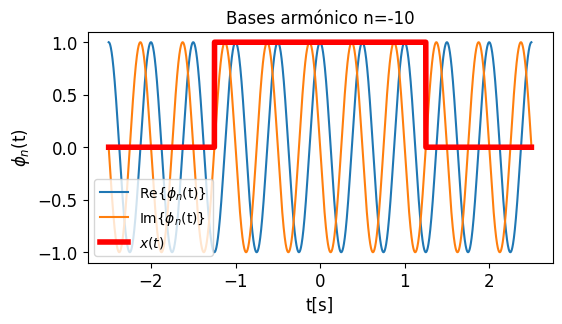

In [ ]:
#Bases

N=10 #Número de armonicos
wo=2*np.pi/T #Frecuencia fundamental

#Definir bases:

phin=np.zeros((Nm, 2*N+1), dtype=np.complex_) #Crear matriz para guardar bases
for n in range(-N, N+1, 1):
    phin[:, n+N]=np.exp(1j*n*wo*tv) #Base de Fourier en el intervalo de interés
from matplotlib import animation, rc
from IPython.display import HTML
fig, ax=plt.subplots(1, 1, figsize=(6, 3))

#Función para gráfico interactivo:

def update(n):

    #Actualización del regresor Bayesiano:

    ax.clear()
    ax.plot(tv, np.real(phin[:, int(n+N)]), label="Re{$\phi_n$(t)}")
    ax.set_xlabel("t[s]", fontsize=12)
    ax.set_ylabel("$\phi_n$(t)", fontsize=12)
    ax.plot(tv, np.imag(phin[:, int(n+N)]), label="Im{$\phi_n$(t)}")
    ax.plot(tv, xo, 'r',linewidth=4, label='$x(t)$')
    ax.set_title(f'Bases armónico n={n}')
    ax.legend(loc='lower left')
    plt.show()

#Desplegar la animación:

anim=animation.FuncAnimation(fig, update, frames=np.arange(-N, N, 1), blit=False)
rc('animation', html='jshtml')
anim

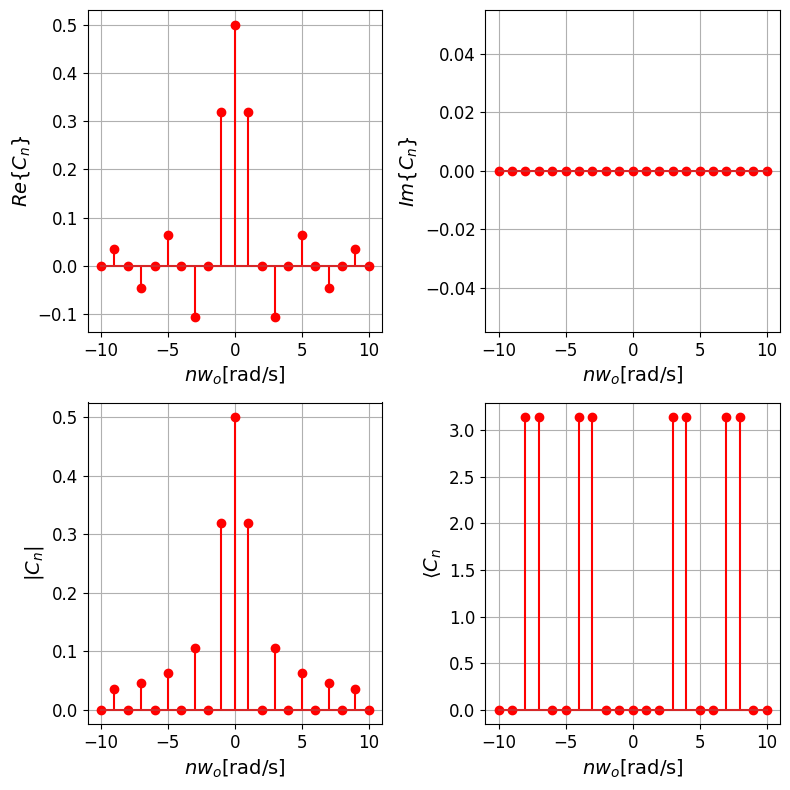

In [ ]:
#Espectro

cn=np.zeros(2*N+1, dtype=np.complex_)
nv=np.linspace(-N, N, 2*N+1) #Vector con el números de armónicos
Cn=A*np.sin(0.5*nv*np.pi)/(nv*np.pi)
Cn[N]=0.5*A #Nivel DC C0
fig=plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 3)
plt.stem(nv, abs(Cn), 'r') #Magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(Cn), 'r') #Fase del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$\langle C_n$', fontsize=14)
plt.axis('tight')
plt.grid()
fig.tight_layout()

interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

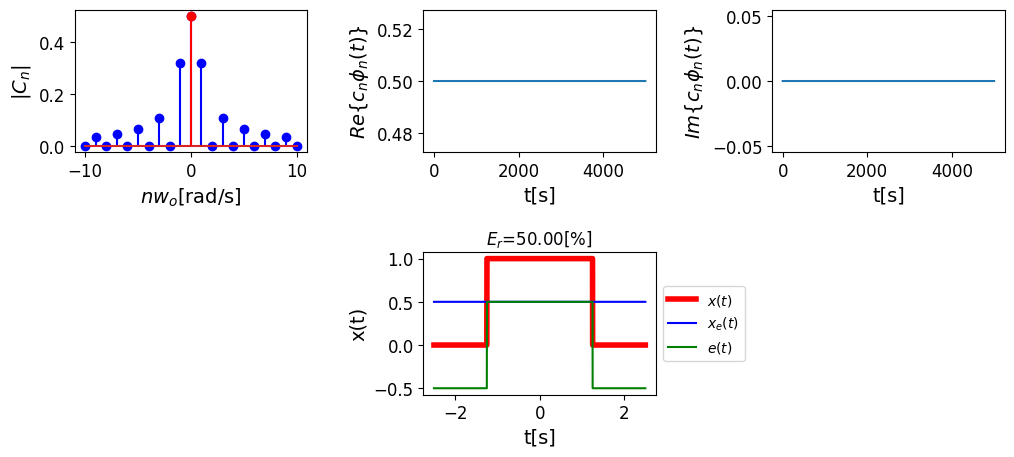

In [ ]:
from ipywidgets import interact

Px=0.5*A**2 #Estimar según la señal estudiada

def pltest(Na=1):
    ind=np.arange(N-Na, N+Na+1)
    er=1-np.sum(abs(Cn[ind])**2)/Px

#Señal reconstruida:

    xe=phin[:, ind].dot(Cn[ind] )
    plt.plot(tv, xe, color='b', label='$x_e(t)$') #Señal estimada
    plt.plot(tv, xo, color='r', label='x(t)') #Señal original
    plt.title('$E_R$=%.2f[%%]'%(100*er), fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest, Na=(1, N, 1))

from matplotlib import animation, rc

fig, ax=plt.subplots(2, 3, figsize=(12, 5))

#Función para el gráfico interactivo:

def update(n):

#Actualización del regresor Bayesiano:

    ax[0, 0].clear()
    ax[0, 1].clear()
    ax[0, 2].clear()
    ax[1, 0].clear()
    ax[1, 1].clear()
    ax[1, 2].clear()

#Espectro:

    ind=np.arange(N-n, N+n+1) #Armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b') #Magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

#Componentes espectrales:

    ce=phin[:, ind].dot(np.diag(Cn[ind]) )
    ax[0, 1].plot(np.real(ce)) #Componente real
    ax[0, 1].set_xlabel('t[s]')
    ax[0, 1].set_ylabel('$Re\{c_n\phi_n(t)\}$')
    ax[0, 2].plot(np.imag(ce)) #Componente imaginario
    ax[0, 2].set_xlabel('t[s]')
    ax[0, 2].set_ylabel('$Im\{c_n\phi_n(t)\}$')

#Reconstruccion:

    er=1-np.sum(abs(Cn[ind])**2)/Px

#Señal reconstruida:

    xe=phin[:, ind].dot(Cn[ind])

#Error en t:

    et=xo-xe
    ax[1, 1].plot(tv, xo, 'r', linewidth=4, label='$x(t)$')
    ax[1, 1].plot(tv, xe, color='b', label='$x_e(t)$') #Señal estimada
    ax[1, 1].plot(tv, et, color='g', label='$e(t)$')
    ax[1, 1].set_title('$E_R$=%.2f[%%]'%(100*er))
    ax[1, 1].set_xlabel('t[s]')
    ax[1, 1].set_ylabel('x(t)')
    ax[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1, 0].axis('off')
    ax[1, 2].axis('off')
    plt.subplots_adjust(wspace=0.5, hspace=0.7)
    plt.show()

#Desplegar animación:

anim=animation.FuncAnimation(fig, update, frames=np.arange(0, N+1, 1), blit=False)
rc('animation', html='jshtml')

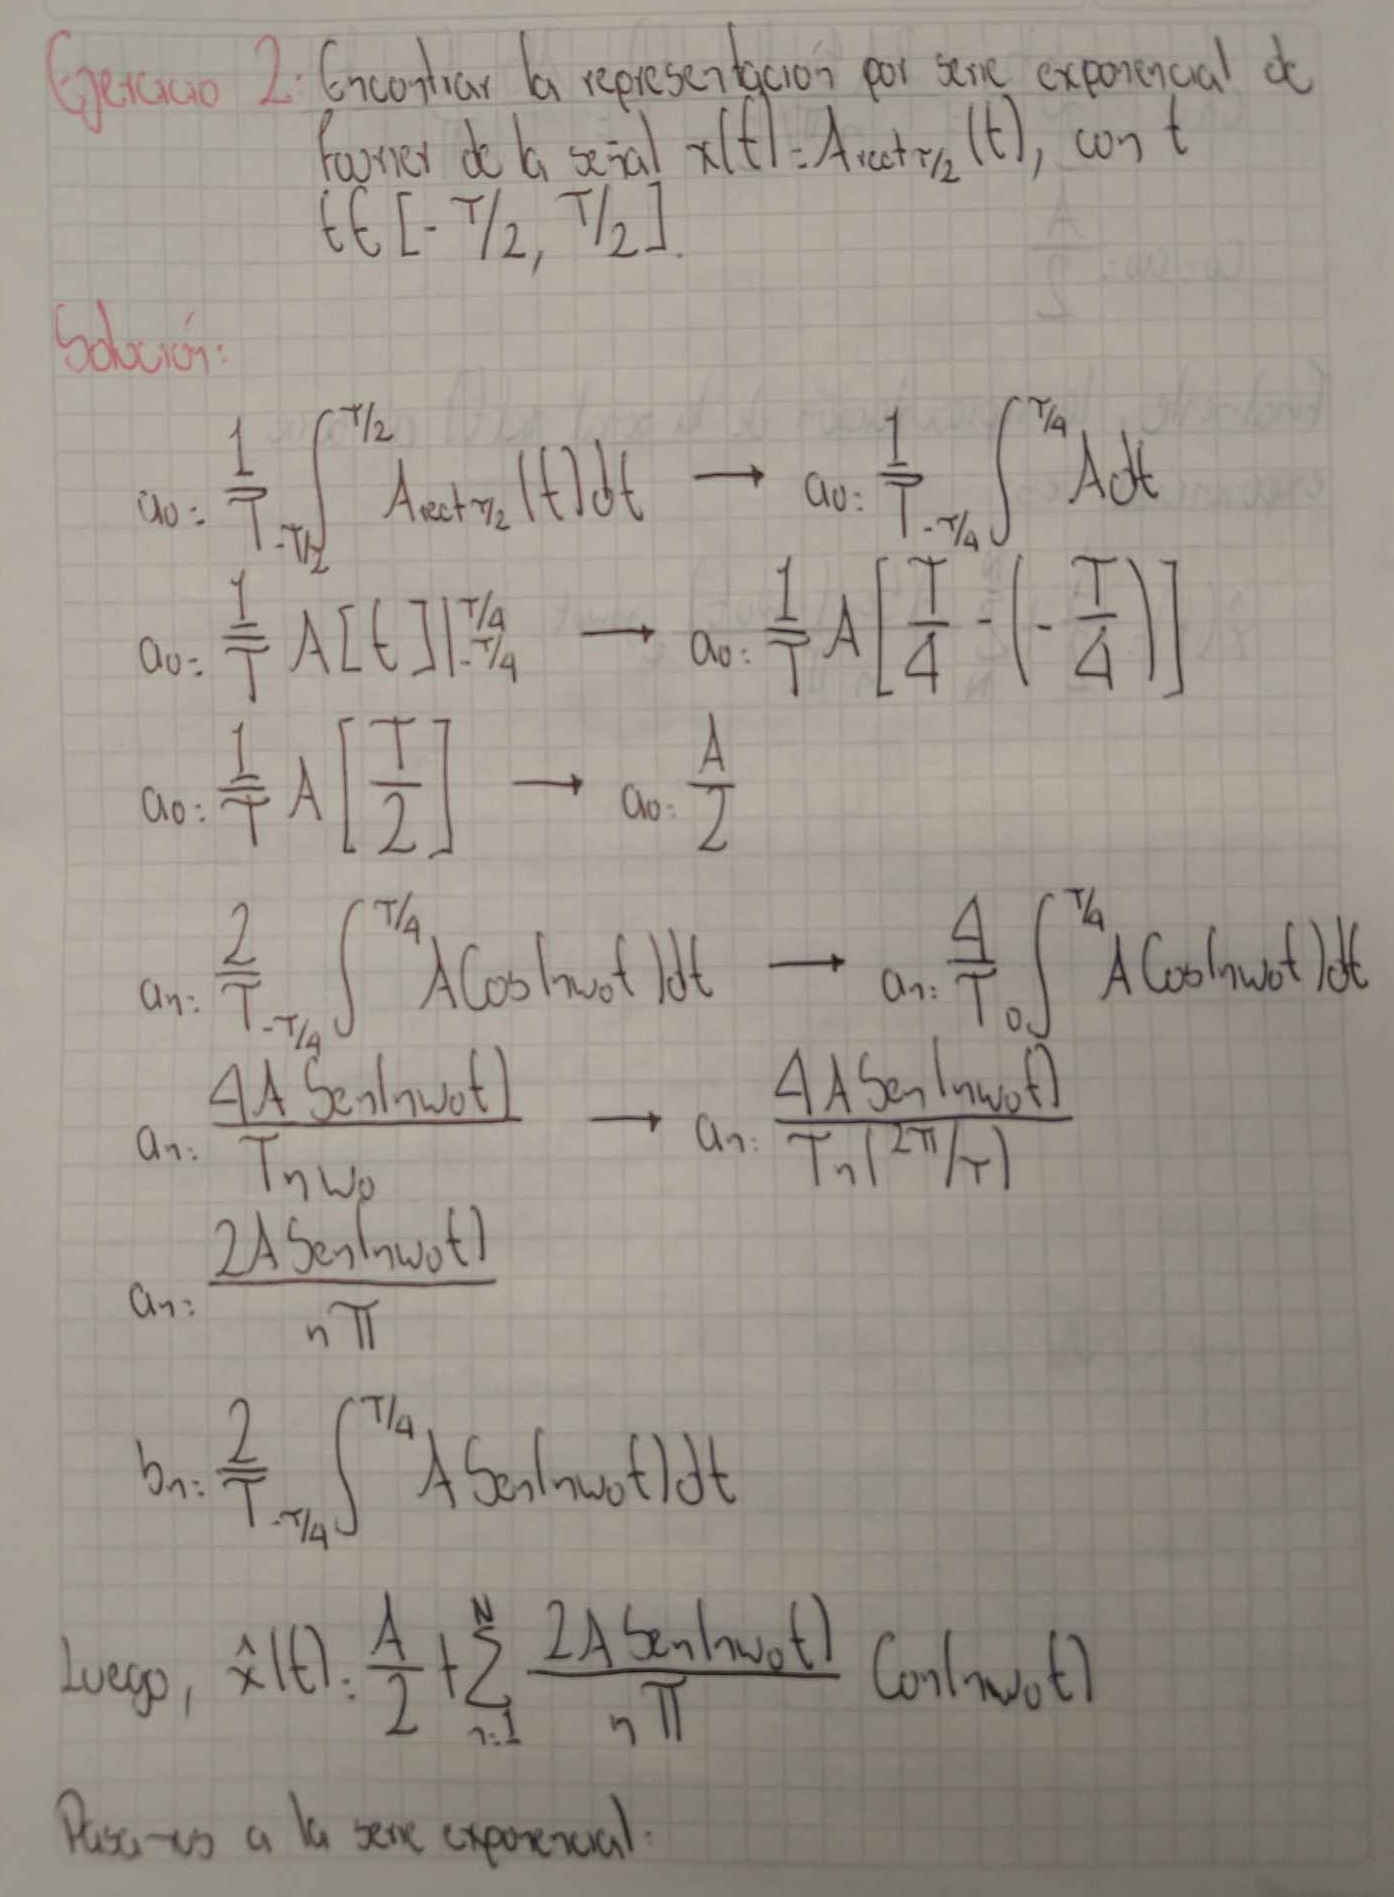

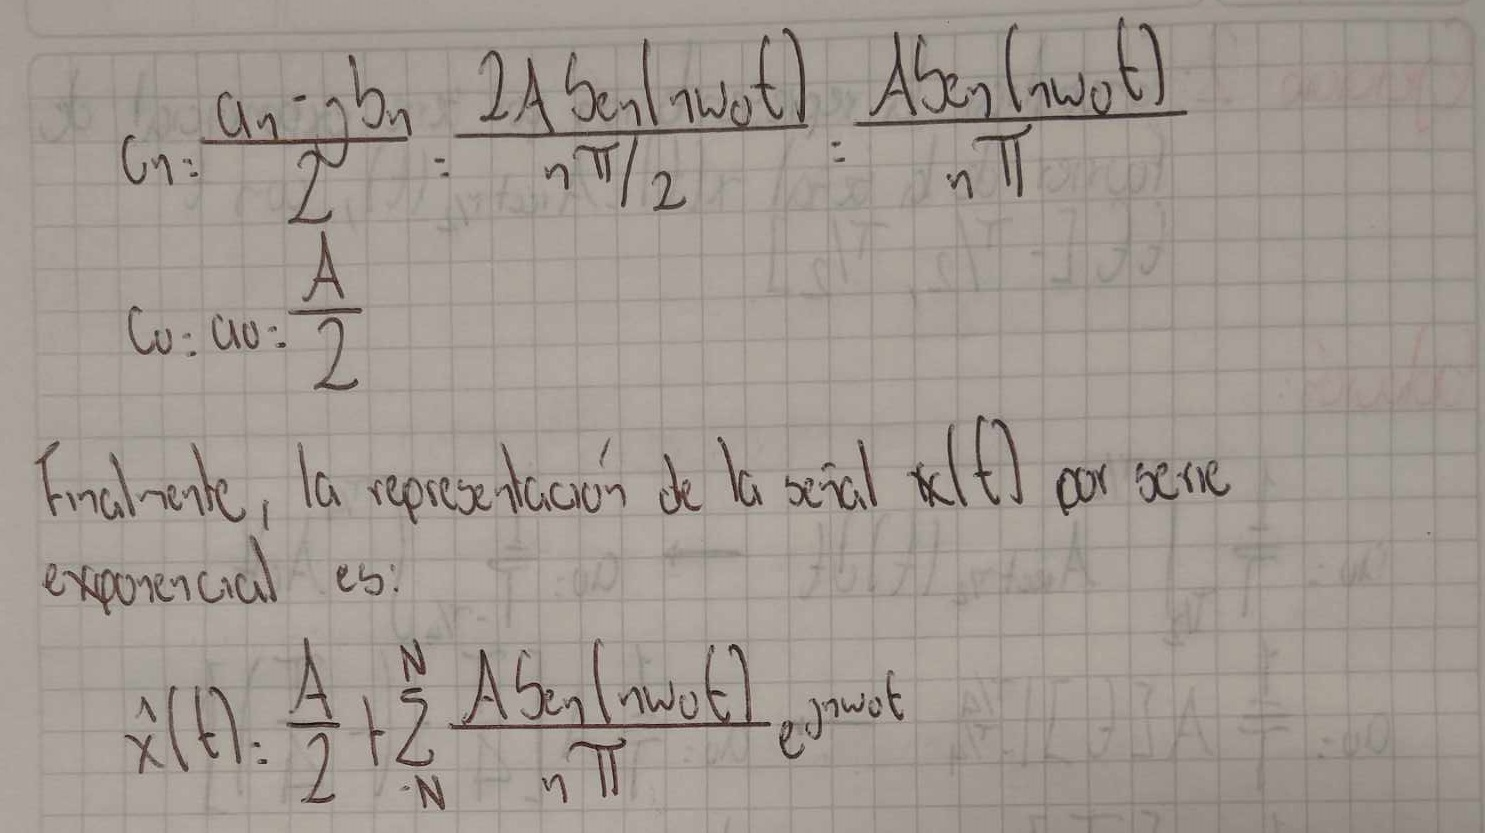